# Лабораторная работа №3


## Название: 
реализация ленточного алгоритма умножения матриц

### Цель: 
используя технологию MPI в python провести перемножение двух матриц по ленточной схеме, сравнить с выполнением последовательного (нераспараллеленного) кода. А также построить зависимость времени работы $T_p$, ускорения $S_p$ и эффективности $E_p$ в зависимости от числа процессоров p и числа разбиений n.

## Теория:

Принципиальный момент при разработке
параллельных алгоритмов - анализ
эффективности использования параллелизма.


#### Показатели эффективности:

##### 1)Ускорение

Ускорение получаемое при использовании
параллельного алгоритма для p процессоров, по
сравнению с последовательным вариантом
выполнения вычислений, определяется величиной

$S_p(n) = T_1(n) / T_p(n)$

##### 2)Эффективность

Эффективность использования параллельным
алгоритмом процессоров при решении задачи
определяется соотношением:

$E_p(n) = T_1(n) / (pT_p(n)) = S_p(n) / p$

(величина эффективности определяет среднюю
долю времени выполнения параллельного
алгоритма, в течение которого процессоры
реально используются для решения задачи)


#### Оценка максимально достижимого параллелизма
1) Оценка качества параллельных вычислений предполагает
знание наилучших (максимально достижимых) значений
показателей ускорения и эффективности

2) Получение идеальных величин $S_p = p$ для ускорения и $E_p = 1$ 
для эффективности может быть обеспечено не для всех
вычислительно трудоемких задач

## Основная часть

Проведем перемножение двух матриц, сравним с выполнением последовательного (нераспараллеленного) кода. Матрица A будет заполняться случайными числами от 1 до 100, матрица B без потери общности будет браться матрицей A

$$b = AA$$

Распараллеливание будет таким: процессор с нулевым рангом будет распределять куски матрицы A по оставшимся поцессорам. То есть запуская расчет на 2 процессорах расчет элементов матрицы будет производить один процессор. Будем называть A_part-часть матрицы A, которую распределили на данный процессор

Используемые скрипты:

0)matrix_generate.py - создание рандомной матрицы нужного размера

 

1)скрипт matrix_multiplication.py - выполняет расчет времени и самого перемножения

2)run_all.sh - запуск расчета для различного числа процессоров и разбиений

Данные, полученные для различных чисел разбиений и процессоров, выглядят так:

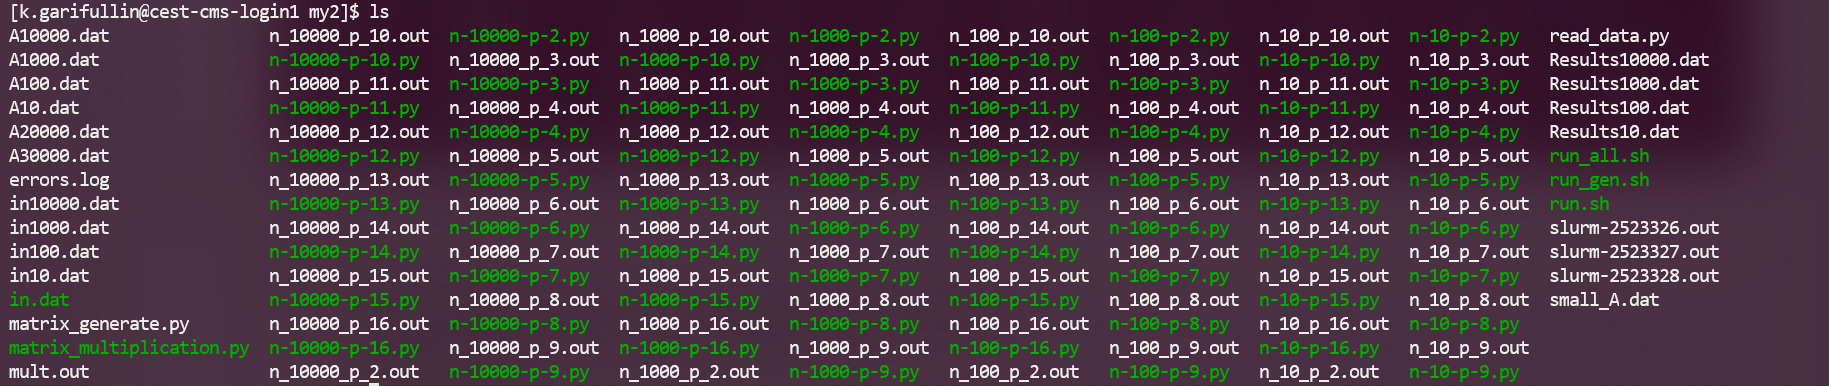

3)read_data.py - обработка данных и их запись в один документ 

Результат обработки в таком виде(1 столбец - число процессоров, 2 - кол-во строк матрицы, 3 - время):

Убедимся в верности кода. Для этого сгенирируем небольшую матрицу 7x7:

При запуске параллельного кода на двух ядрах все строки и столбцы матрицы будут обсчитываться на 1 процессоре(второй процессор расределяет матрицу и не участвует в обсчете матрицы). Поэтому A_part(часть матрицы которую нулевой процессор распределил на этот поцессор) будет равна просто A, B_part соотвественно B.

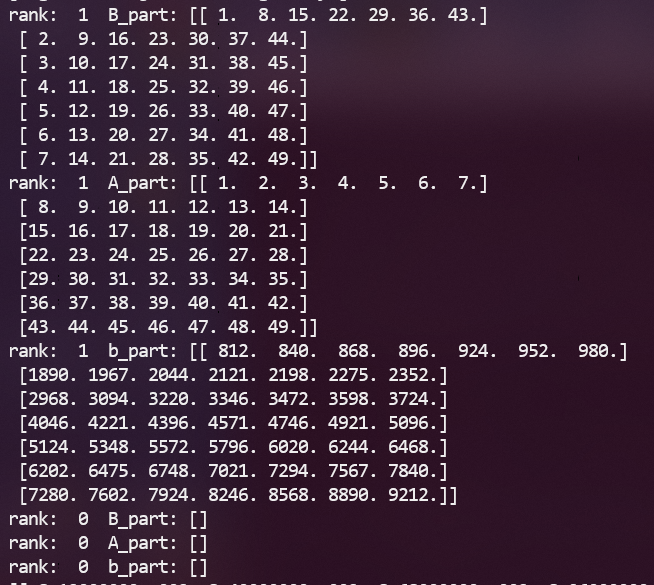

Получившаяся матрица b_part равна матрице b: $$b = AA$$

для сравнения, результат перемножения, полученный на онлайн сервисе, такой же:

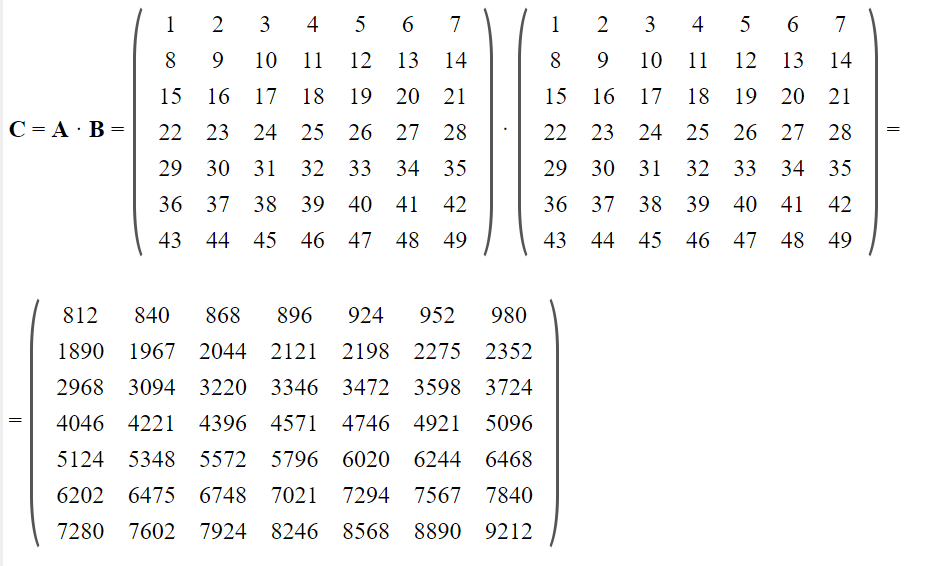

Произведем для проверки второй предельный случай: обсчет матрицы 7x7 на 8 процессорах(из которых 1 процессор распределяет матрицу A). Тогда получается, что на каждом процессоре будет ровно по одной строке матрицы A и по семь столбцов матрицы B-каждый процессор посчитает ровно 7 элементов:

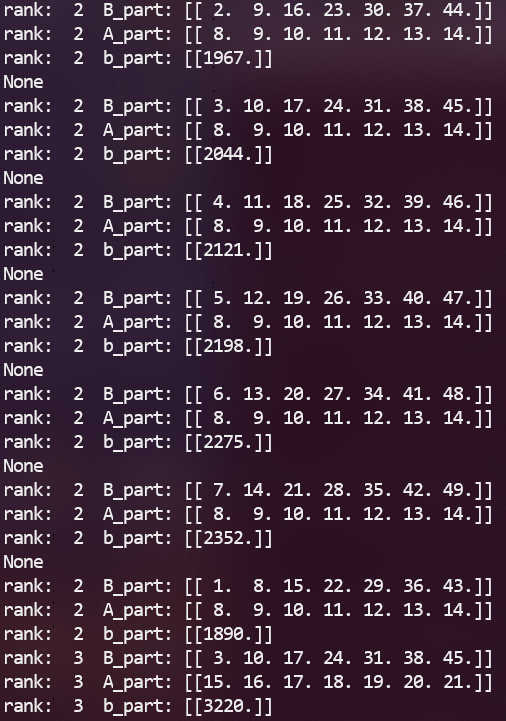

как видно процессор со вторым рангом посчитал 7 элементов, которые совпадают с элементами матрицы обсчитанной на 2 процессорах

4)последний шаг - построние графиков

In [1]:
import random
import math
import matplotlib
import time
import numpy as np
import matplotlib.pyplot as plt

# t(p)

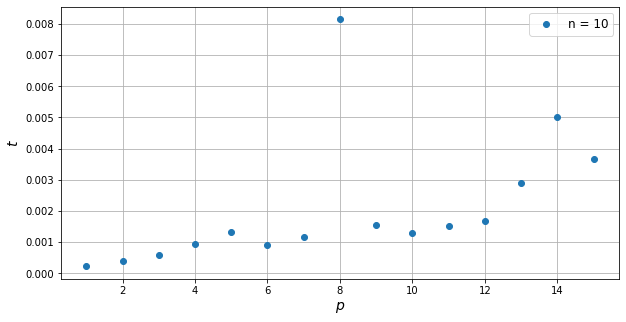

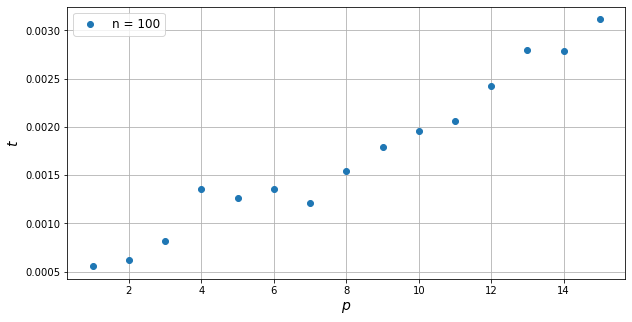

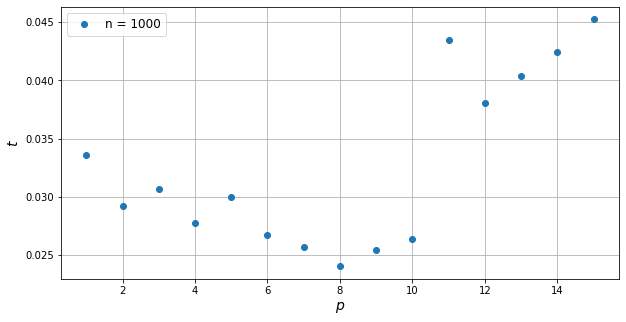

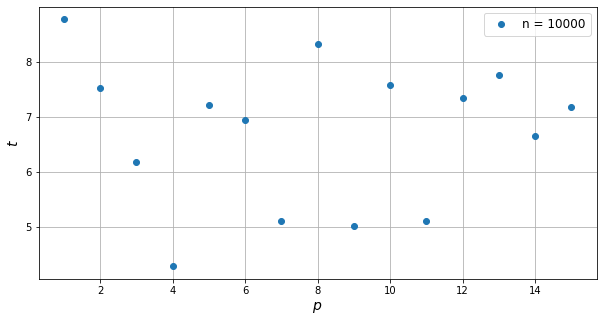

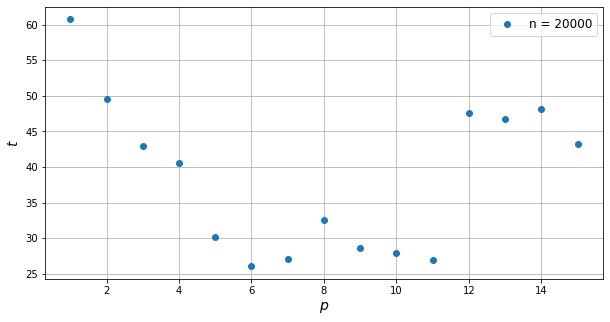

In [3]:
arr = [10,100, 1000, 10000, 20000]
for acc in arr:
    p = []
    t = []
    f = open('mult.out')
    count=0
    for line in f:
        a=line.split()
        if(int(a[1])==acc):
            p.append(int(a[0])-1)
            t.append(float(a[2]))
            #print(line)
    #print(acc)
    plt.figure(figsize=(10, 5))

    plt.plot(p, t,"o", label=("n = " + str(acc)))

    plt.xlabel(r'$p$', fontsize=14)
    plt.ylabel(r'$t$', fontsize=14)
    plt.grid(True)
    plt.legend(loc='best', fontsize=12)
    plt.savefig('figure_with_legend.png')
    plt.show()

# t(n)

2 10 0.00022451579570770264

2 100 0.0005550086498260498

2 1000 0.03362405300140381

2 10000 8.765917003154755

2 20000 60.7255367487669

20000


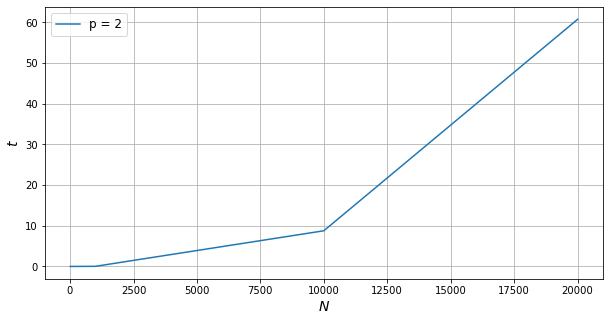

3 10 0.00040084123611450195

3 100 0.0006194561719894409

3 1000 0.02924342453479767

3 10000 7.528536945581436

3 20000 49.50002884864807

20000


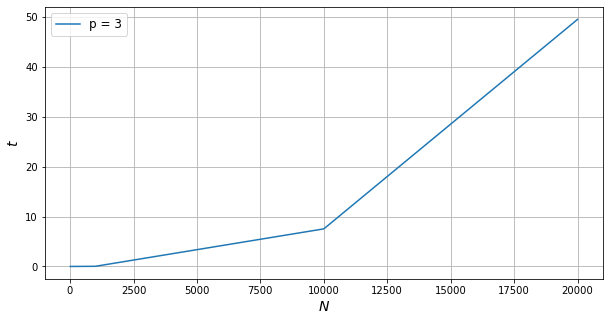

4 10 0.000592157244682312

4 100 0.0008155554533004761

4 1000 0.030690595507621765

4 10000 6.185192942619324

4 20000 42.89727607369423

20000


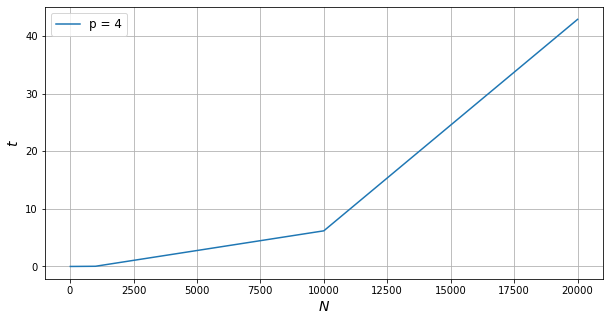

5 10 0.000941053032875061

5 100 0.0013609230518341064

5 1000 0.02771550416946411

5 10000 4.284105598926544

5 20000 40.5527001619339

20000


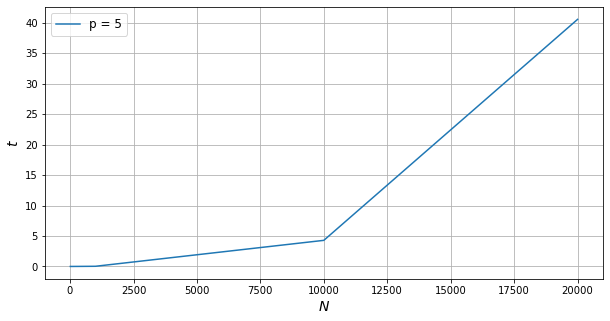

6 10 0.0013391971588134766

6 100 0.001260504126548767

6 1000 0.029953300952911377

6 10000 7.21559602022171

6 20000 30.179062843322754

20000


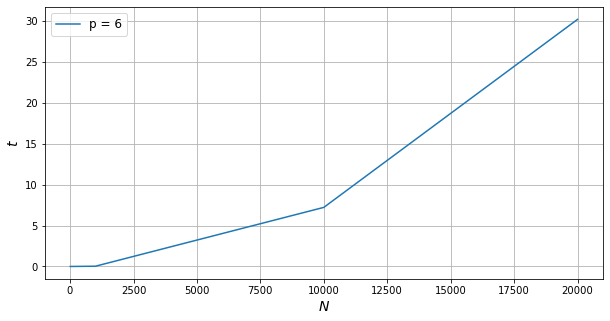

7 10 0.0009195208549499512

7 100 0.0013589262962341309

7 1000 0.02673366665840149

7 10000 6.934946224093437

7 20000 26.049253195524216

20000


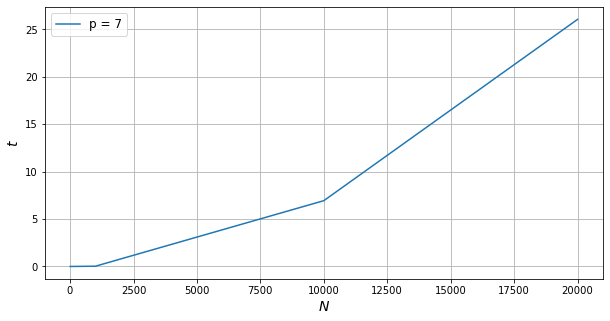

8 10 0.0011774152517318726

8 100 0.00121384859085083

8 1000 0.025661751627922058

8 10000 5.104750141501427

8 20000 27.082774564623833

20000


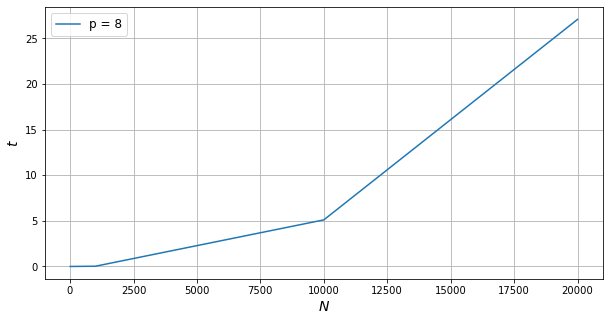

9 10 0.008146539330482483

9 100 0.0015448331832885742

9 1000 0.024016350507736206

9 10000 8.318145737051964

9 20000 32.58228363096714

20000


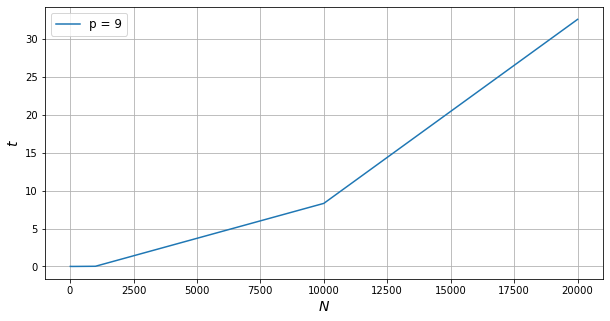

10 10 0.0015565454959869385

10 100 0.0017877519130706787

10 1000 0.02543044090270996

10 10000 5.021412327885628

10 20000 28.56896050274372

20000


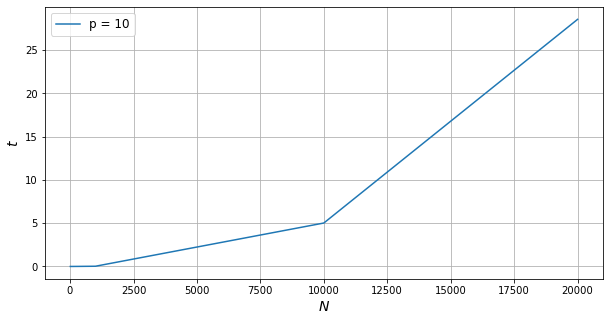

11 10 0.0012929141521453857

11 100 0.001961454749107361

11 1000 0.026405975222587585

11 10000 7.575403273105621

11 20000 27.909295737743378

20000


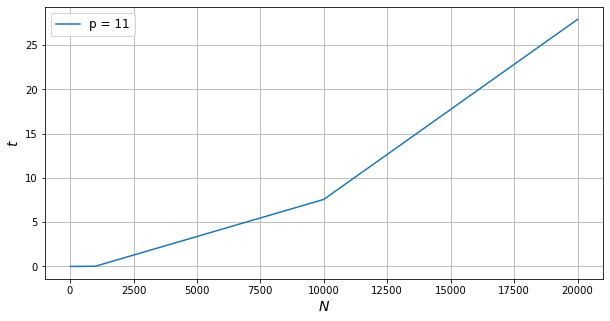

12 10 0.0015175491571426392

12 100 0.002062380313873291

12 1000 0.04350394010543823

12 10000 5.099940463900566

12 20000 27.000028744339943

20000


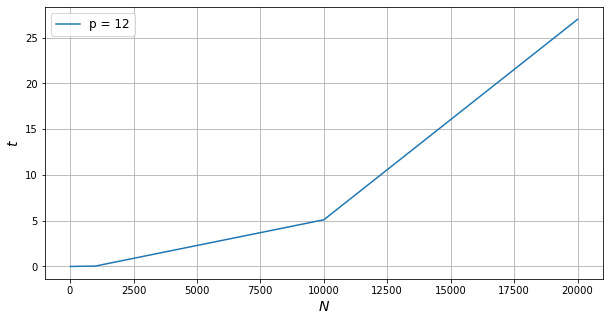

13 10 0.0016959011554718018

13 100 0.0024200230836868286

13 1000 0.03806668519973755

13 10000 7.34559540450573

13 20000 47.60884711146355

20000


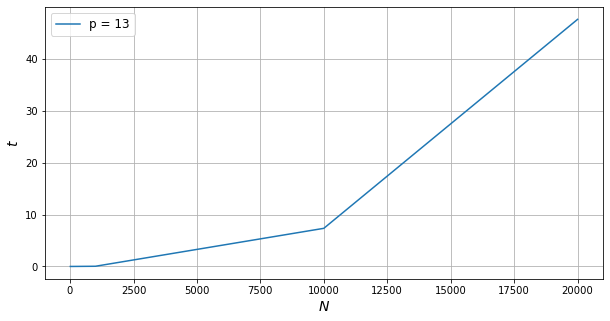

14 10 0.0029113441705703735

14 100 0.002795577049255371

14 1000 0.04036889970302582

14 10000 7.760605961084366

14 20000 46.759066462516785

20000


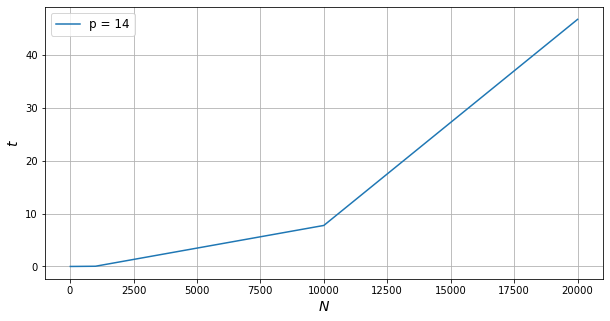

15 10 0.00502990186214447

15 100 0.0027861446142196655

15 1000 0.04243531823158264

15 10000 6.654892399907112

15 20000 48.12476287782192

20000


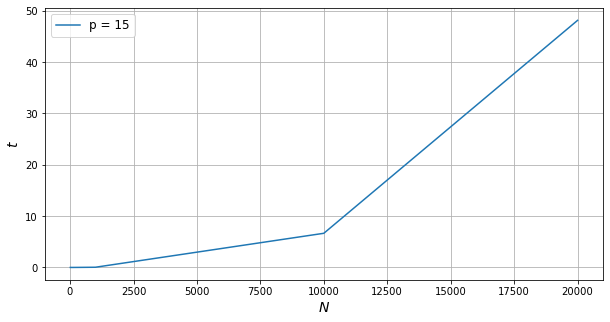

16 10 0.00366857647895813

16 100 0.0031146258115768433

16 1000 0.04524126648902893

16 10000 7.182432651519775

16 20000 43.26820261776447
20000


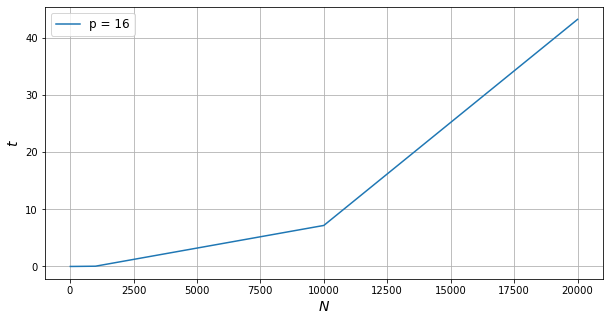

In [4]:

for i in range(2,17):
    p = []
    t = []
    f = open('mult.out')
    count=0
    for line in f:
        a=line.split()
        if(int(a[0])==i):
            p.append(int(a[1]))
            t.append(float(a[2]))
            print(line)
    print(acc)
    plt.figure(figsize=(10, 5))

    plt.plot(p, t, label=("p = " + str(i)))

    plt.xlabel(r'$N$', fontsize=14)
    plt.ylabel(r'$t$', fontsize=14)
    plt.grid(True)
    plt.legend(loc='best', fontsize=12)
    plt.savefig('figure_with_legend.png')
    plt.show()

## Ускорение $S_p$

T1:  0.00022451579570770264
2 10 0.00022451579570770264

3 10 0.00040084123611450195

4 10 0.000592157244682312

5 10 0.000941053032875061

6 10 0.0013391971588134766

7 10 0.0009195208549499512

8 10 0.0011774152517318726

9 10 0.008146539330482483

10 10 0.0015565454959869385

11 10 0.0012929141521453857

12 10 0.0015175491571426392

13 10 0.0016959011554718018

14 10 0.0029113441705703735

15 10 0.00502990186214447

16 10 0.00366857647895813

10


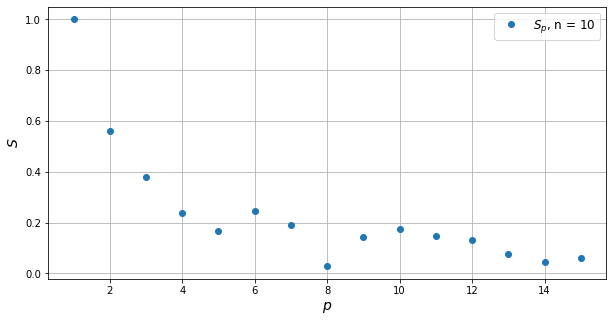

T1:  0.0005550086498260498
2 100 0.0005550086498260498

3 100 0.0006194561719894409

4 100 0.0008155554533004761

5 100 0.0013609230518341064

6 100 0.001260504126548767

7 100 0.0013589262962341309

8 100 0.00121384859085083

9 100 0.0015448331832885742

10 100 0.0017877519130706787

11 100 0.001961454749107361

12 100 0.002062380313873291

13 100 0.0024200230836868286

14 100 0.002795577049255371

15 100 0.0027861446142196655

16 100 0.0031146258115768433

100


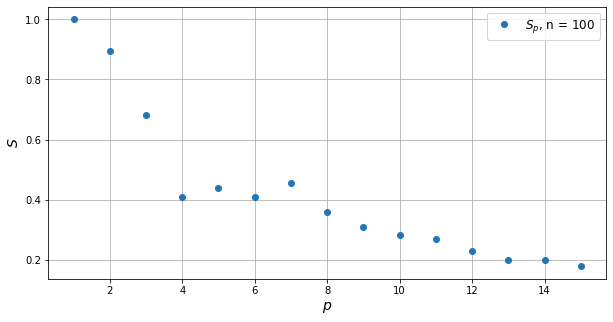

T1:  0.03362405300140381
2 1000 0.03362405300140381

3 1000 0.02924342453479767

4 1000 0.030690595507621765

5 1000 0.02771550416946411

6 1000 0.029953300952911377

7 1000 0.02673366665840149

8 1000 0.025661751627922058

9 1000 0.024016350507736206

10 1000 0.02543044090270996

11 1000 0.026405975222587585

12 1000 0.04350394010543823

13 1000 0.03806668519973755

14 1000 0.04036889970302582

15 1000 0.04243531823158264

16 1000 0.04524126648902893

1000


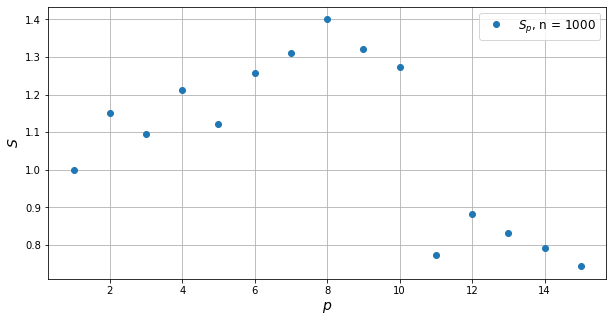

T1:  8.765917003154755
2 10000 8.765917003154755

3 10000 7.528536945581436

4 10000 6.185192942619324

5 10000 4.284105598926544

6 10000 7.21559602022171

7 10000 6.934946224093437

8 10000 5.104750141501427

9 10000 8.318145737051964

10 10000 5.021412327885628

11 10000 7.575403273105621

12 10000 5.099940463900566

13 10000 7.34559540450573

14 10000 7.760605961084366

15 10000 6.654892399907112

16 10000 7.182432651519775

10000


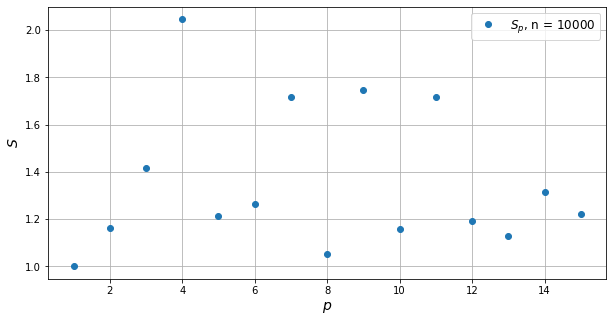

T1:  60.7255367487669
2 20000 60.7255367487669

3 20000 49.50002884864807

4 20000 42.89727607369423

5 20000 44.5527001619339

6 20000 50.179062843322754

7 20000 26.049253195524216

8 20000 27.082774564623833

9 20000 32.58228363096714

10 20000 28.56896050274372

11 20000 27.909295737743378

12 20000 27.000028744339943

13 20000 47.60884711146355

14 20000 46.759066462516785

15 20000 48.12476287782192

16 20000 43.26820261776447
20000


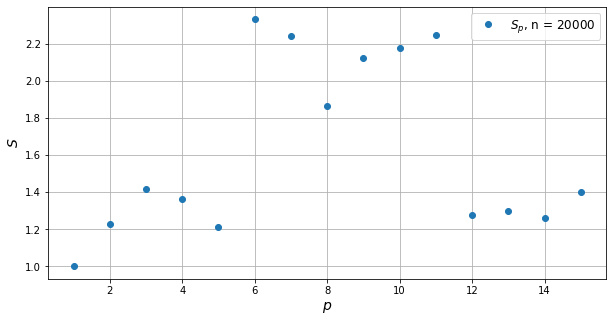

In [24]:
def amdal(p, f):
    return 1/(f + (1-f)/p)
arr = [10,100, 1000, 10000, 20000]
for acc in arr:
    amd =[]
    p = []
    t = []
    f = open('mult.out')
    count=0
    for line in f:
        a=line.split()
        if(int(a[1]) == acc and int(a[0]) == 2 ):
            T1=float(a[2])
            print("T1: ",T1)
            
        if(int(a[1])==acc):
            p.append(int(a[0])-1)
            t.append(T1/float(a[2]))
            amd.append(amdal(int(a[0]), 1.0/int(a[0])))
            print(line)
    print(acc)
    plt.figure(figsize=(10, 5))
    
    plt.plot(p, t, 'o',label = ("$S_p$, n = "+str(acc)))
    #plt.plot(p, amd, 'o',label = "amdal")
    #plt.plot(p, p, 'o',label = "ideal")
    plt.xlabel(r'$p$', fontsize=14)
    plt.ylabel(r'$S$', fontsize=14)
    plt.grid(True)
    plt.legend(loc='best', fontsize=12)
    plt.savefig('figure_with_legend.png')
    plt.show()

## Ускорение $S_n$  
$S_n(p) = T_{1}(n) / T_p(n)$

In [16]:

T=[]

for j in range(2,17):
    f = open('mult.out')
    T1=[]
    for line in f:
        a=line.split()
        if (int(a[0]) == j):
            #print(a)
            T1.append(float(a[2]))
    T.append(T1)

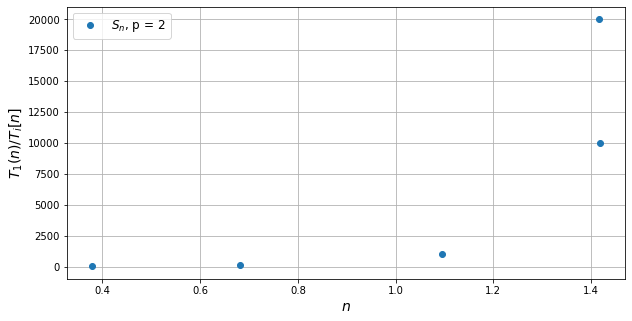

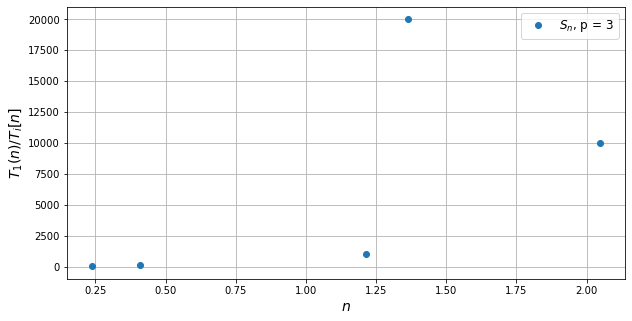

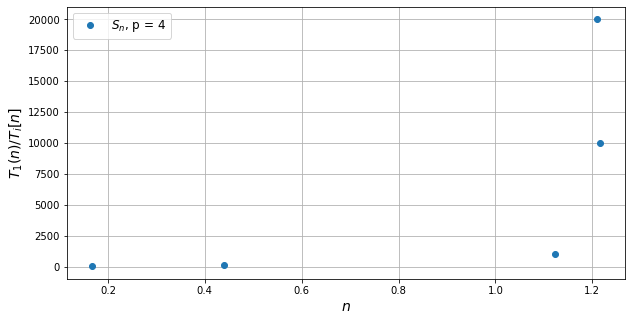

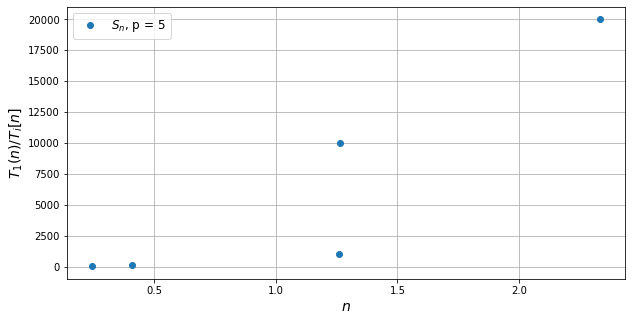

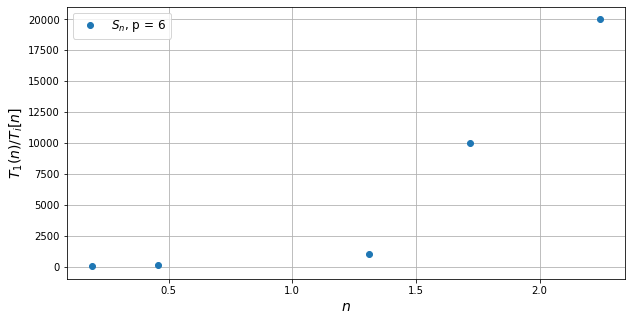

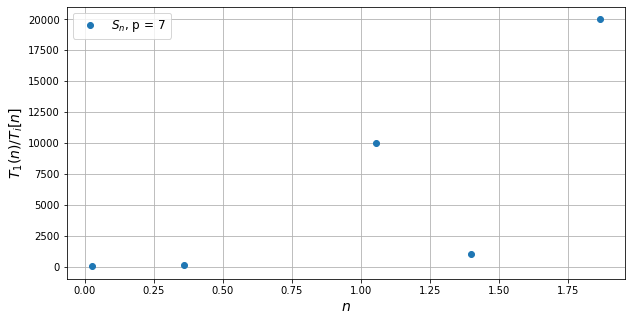

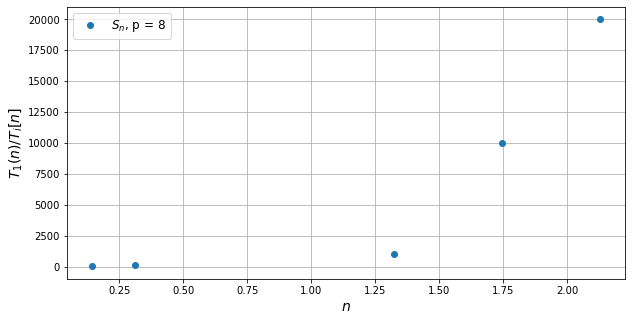

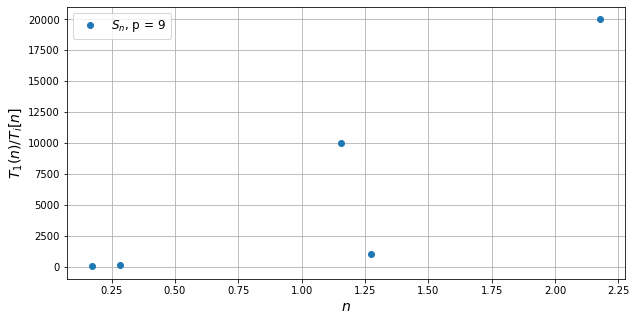

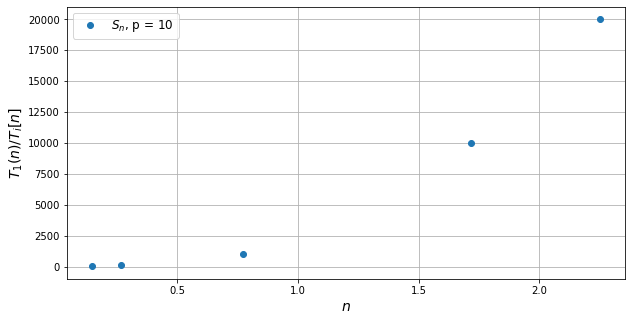

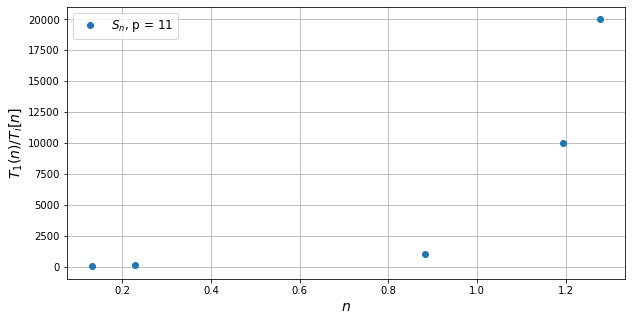

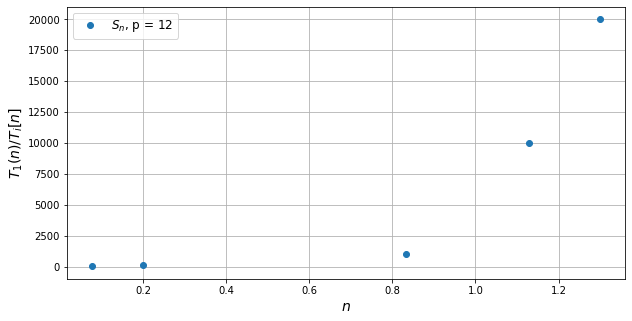

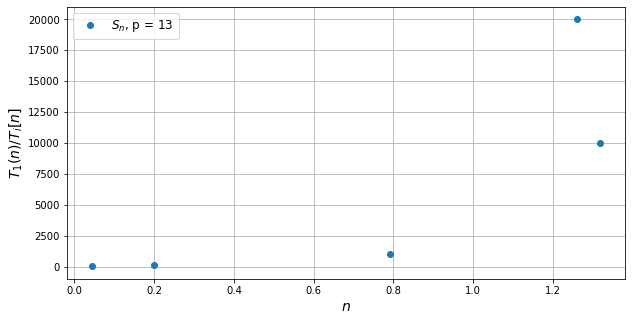

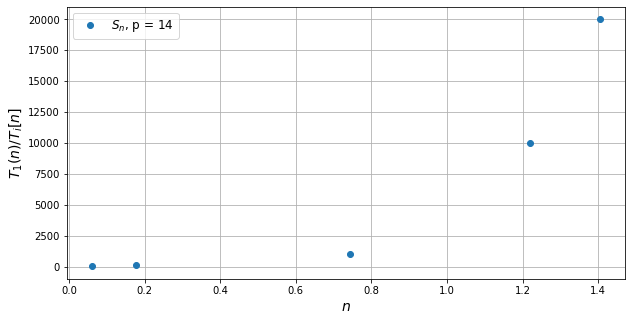

In [29]:
arr = [10,100, 1000, 10000, 20000]
for i in range(2,15):
    plt.figure(figsize=(10, 5))
    plt.plot(np.array(T[0])/np.array(T[i]), arr, 'o',label = ("$S_n$, p = "+ str(i)))

    plt.xlabel(r'$n$', fontsize=14)
    plt.ylabel(r'$T_1(n)/T_i[n]$', fontsize=14)
    plt.grid(True)
    plt.legend(loc='best', fontsize=12)

    plt.show()
            

## Эффективность $E_p$

T1:  0.00022451579570770264
2 10 0.00022451579570770264

3 10 0.00040084123611450195

4 10 0.000592157244682312

5 10 0.000941053032875061

6 10 0.0013391971588134766

7 10 0.0009195208549499512

8 10 0.0011774152517318726

9 10 0.008146539330482483

10 10 0.0015565454959869385

11 10 0.0012929141521453857

12 10 0.0015175491571426392

13 10 0.0016959011554718018

14 10 0.0029113441705703735

15 10 0.00502990186214447

16 10 0.00366857647895813

10


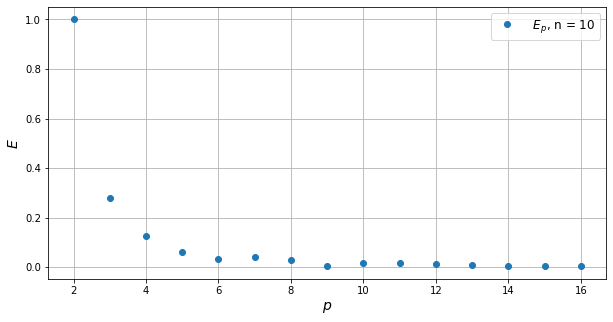

T1:  0.0005550086498260498
2 100 0.0005550086498260498

3 100 0.0006194561719894409

4 100 0.0008155554533004761

5 100 0.0013609230518341064

6 100 0.001260504126548767

7 100 0.0013589262962341309

8 100 0.00121384859085083

9 100 0.0015448331832885742

10 100 0.0017877519130706787

11 100 0.001961454749107361

12 100 0.002062380313873291

13 100 0.0024200230836868286

14 100 0.002795577049255371

15 100 0.0027861446142196655

16 100 0.0031146258115768433

100


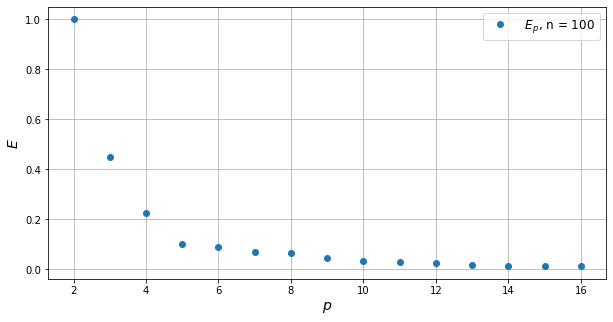

T1:  0.03362405300140381
2 1000 0.03362405300140381

3 1000 0.02924342453479767

4 1000 0.030690595507621765

5 1000 0.02771550416946411

6 1000 0.029953300952911377

7 1000 0.02673366665840149

8 1000 0.025661751627922058

9 1000 0.024016350507736206

10 1000 0.02543044090270996

11 1000 0.026405975222587585

12 1000 0.04350394010543823

13 1000 0.03806668519973755

14 1000 0.04036889970302582

15 1000 0.04243531823158264

16 1000 0.04524126648902893

1000


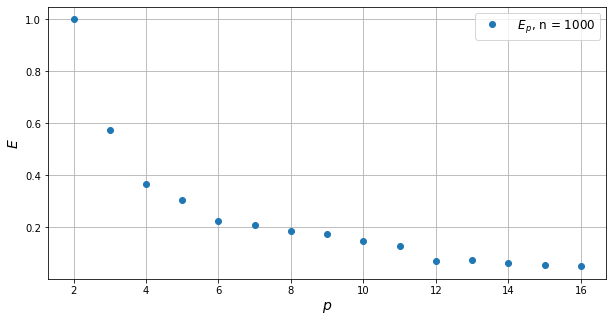

T1:  8.765917003154755
2 10000 8.765917003154755

3 10000 7.528536945581436

4 10000 6.185192942619324

5 10000 4.284105598926544

6 10000 7.21559602022171

7 10000 6.934946224093437

8 10000 5.104750141501427

9 10000 8.318145737051964

10 10000 5.021412327885628

11 10000 7.575403273105621

12 10000 5.099940463900566

13 10000 7.34559540450573

14 10000 7.760605961084366

15 10000 6.654892399907112

16 10000 7.182432651519775

10000


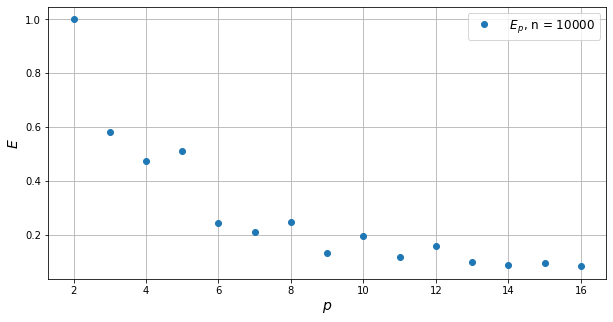

T1:  60.7255367487669
2 20000 60.7255367487669

3 20000 49.50002884864807

4 20000 42.89727607369423

5 20000 40.5527001619339

6 20000 30.179062843322754

7 20000 26.049253195524216

8 20000 27.082774564623833

9 20000 32.58228363096714

10 20000 28.56896050274372

11 20000 27.909295737743378

12 20000 27.000028744339943

13 20000 47.60884711146355

14 20000 46.759066462516785

15 20000 48.12476287782192

16 20000 43.26820261776447
20000


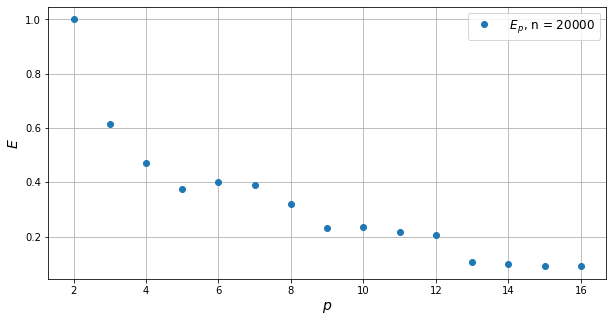

In [5]:
arr = [10,100, 1000, 10000, 20000]
for acc in arr:
    p = []
    t = []
    f = open('mult.out')
    count=0
    for line in f:
        a=line.split()
        if(int(a[1]) == acc and int(a[0]) == 2 ):
            T1=float(a[2])
            print("T1: ",T1)
            
        if(int(a[1])==acc):
            p.append(int(a[0]))
            t.append(T1/((int(a[0])-1)*float(a[2])))
            print(line)
    print(acc)
    plt.figure(figsize=(10, 5))
    
    plt.plot(p, t, 'o',label = (" $E_p$, n = "+str(acc)))
    
    #plt.plot(p, [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1], 'o',label = "ideal")
    plt.xlabel(r'$p$', fontsize=14)
    plt.ylabel(r'$E$', fontsize=14)
    plt.grid(True)
    plt.legend(loc='best', fontsize=12)
   
    plt.show()

## Эффективность $E_n$

In [7]:
T=[]

for j in range(2,17):
    f = open('mult.out')
    T1=[]
    for line in f:
        a=line.split()
        if (int(a[0]) == j):
            #print(a)
            T1.append(float(a[2]))
    T.append(T1)

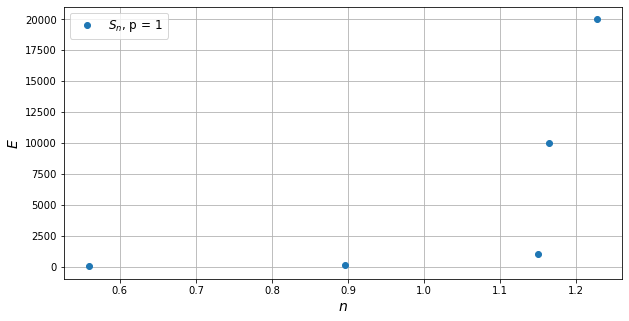

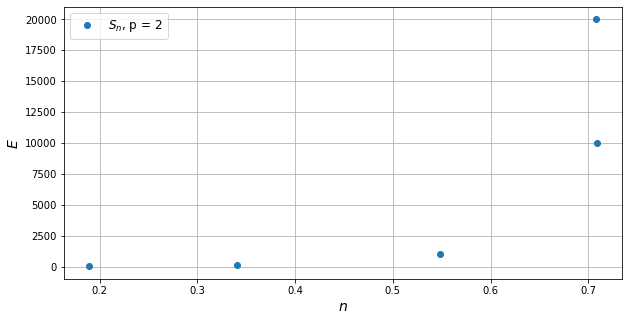

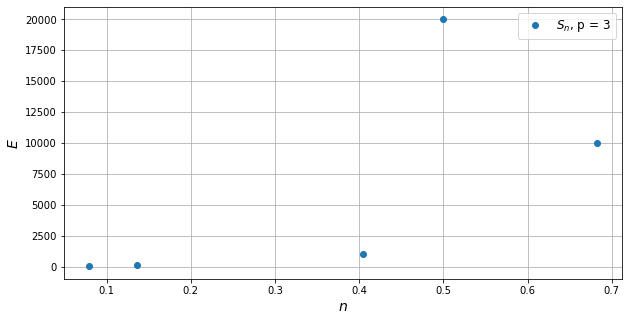

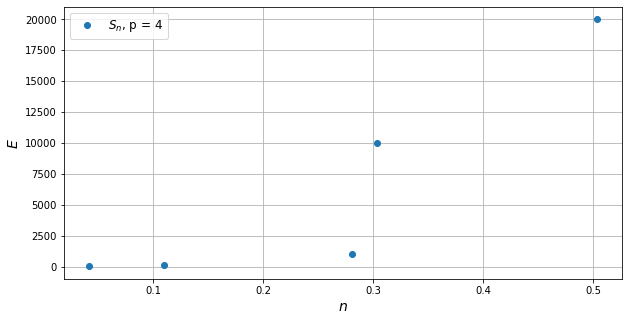

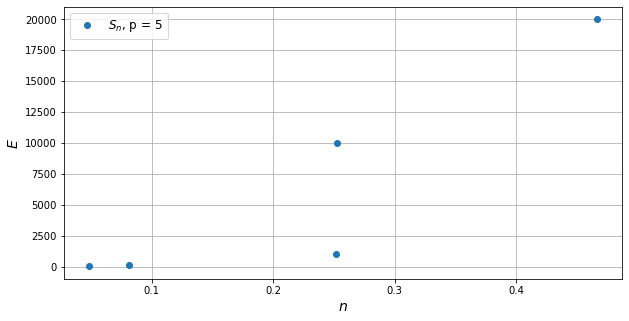

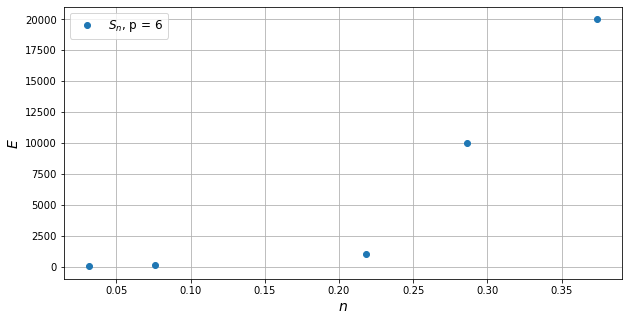

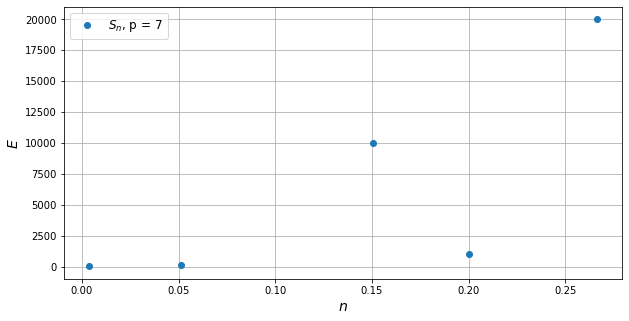

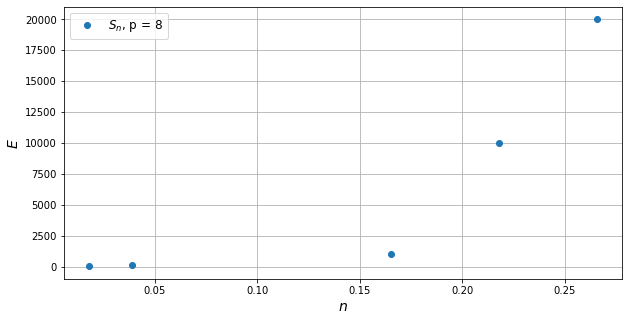

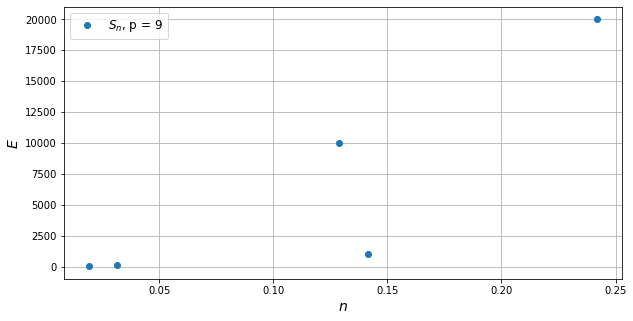

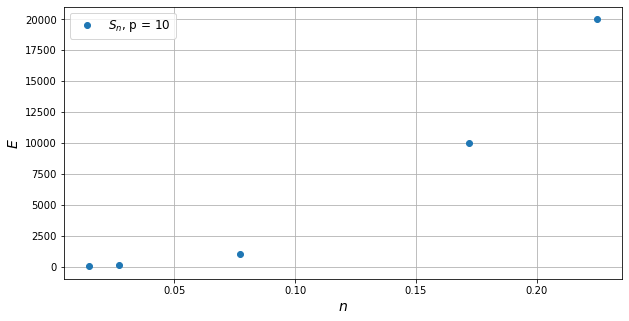

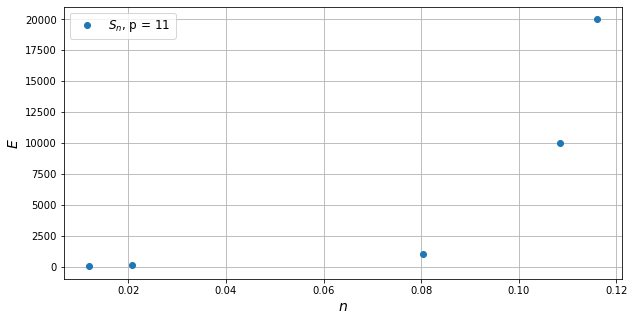

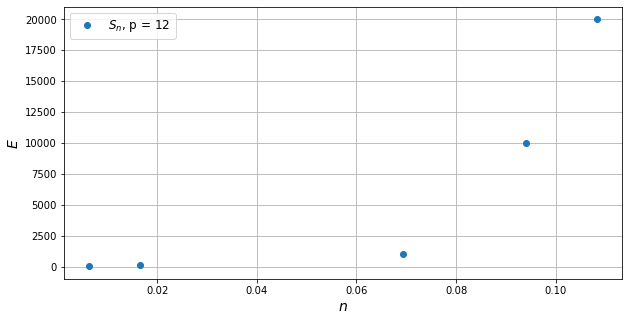

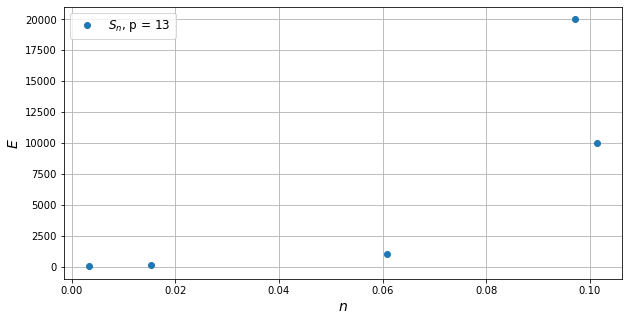

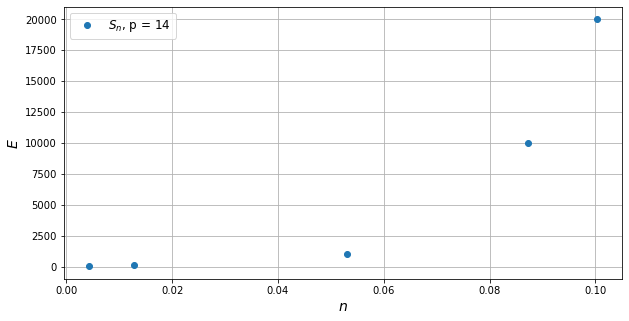

In [8]:
arr = [10,100, 1000, 10000, 20000]
for i in range(1,15):
    plt.figure(figsize=(10, 5))
    plt.plot(np.array(T[0])/np.array(T[i])/i, arr, 'o',label = ("$S_n$, p = "+ str(i)))

    plt.xlabel(r'$n$', fontsize=14)
    plt.ylabel(r'$E$', fontsize=14)
    plt.grid(True)
    plt.legend(loc='best', fontsize=12)

    plt.show()

## Вывод

Таким образом, были получены следующие результаты

1)для малых матриц T(p) растет при увеличении числа процессоров, это связяно с тем, что пересылка сообщений от процессора к процессору затрачивает много рессурсов и не оправдана для таких малых матриц.

2)для больших матриц(самым показательным является график для n=20000) T(p) падает и достигает минимума для p=6, далее выходит на константу при p от 6 до 12, а при большем числе процессоров начинает расти, опять же это связано с тем, что время затрачиваемое на передачу информации от процессора к процессору становится больше, чем время требуемое на расчет. 

3)логично предположить, что для матриц еще бОльших, минимум времени будет приходится на еще бОльшее число процессоров 

4)перемножение матриц 20000x20000 следует производить на 6 процессорах - так время затрачиваемое на расчеты минимально. Увеличивать число процессоров не имеет смысла 

5)T(n) увеличивается линейно от n

6)для малых матриц (n<1000) $S_p$ падает, что показывает, что параллельный расчет лишь замедляет работу 

7)для больших матриц (n>1000) $S_p$ сначала растет, потом начинает падать, что показывает, что параллельный расчет ускоряет работу при выборе определленого числа процессоров(это число не должно быть большим, так как при больших p код работает медленнее, что показано на графике)

8)для самой большой матрицы максимальное ускорение есть 2.4 и достигается при 6 процессорах

9)при увеличении n эффективность растет(при р = const)- так как процессоры больше загружены, но при увеличени p падает(при n = const), так процессоры больше простаивают 

10)анализ графиков эффективности показывает, что процессоры при большом распараллеливании не эффективны